In [22]:
from article_hypothesis_check import do_and_visualize_analysis,partition_returns_into_session,style_df_based_on_pval
from simulate_data import simulate_fx_data, plot_price
from robustness_check import bootstrap_analysis
from identify_significant_hrs import plot_cum_mean_returns_per_hour, sr_per_hour
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# I - Data Simulation
#### Finding free FX intraday data covering a long history proved to be challenging.
#### We will simulate the spot exchange rate as a geometric brownian motion.
#### To simulate the different behaviours between different trading sessions, we will use different drift values for foreign vs local session.
#### We will consider that prices are quoted as CCYUSD, so that negative returns indicate currency depreciating

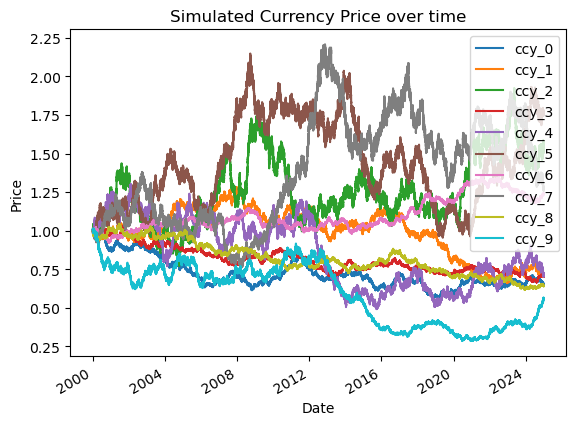

In [13]:
# Calculate simulated data 
data = simulate_fx_data(n_currencies=10)
#Compute log returns
returns = np.log(data.pct_change()+1)
# Plot Price for visualization
plot_price(data,n_plots=10)

# II - Trading sessions
### The article formulates the following hypothesis:
#### - home currencies depreciate during their local trading hours as well as during LDN-NY overlap.
#### - home currencies appreciate in the US session (between LDN 'close' and NY 'close')
#### - home currencies returns are insignficant outside of those sessions

### To simplify, we will assume that all our currencies in our simulated data follow LDN time zone.
#### As such we can form the following trading sessions (which is what we used for simulating the data with the corresponding pattern):
#### - Non US session : 0AM to 7AM 
#### - Domestic session : 7AM to 2PM
#### - LDN NY overlap: 2PM to 6PM
#### - US session : 6PM to 10PM

# III - Identify trading sessions
#### Assuming we do not know the data is simulated, we will first attempt to confirm the pattern highlighted in the article through a graphic approach and by measuring the
#### Sharpe Ratio of returns per hour accross currencies.

a - We plot the average cumulative returns per hour accross currencies. This clearly highlights intraday seasonal pattern of depreciation in domestic session and then subsequent appreciation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


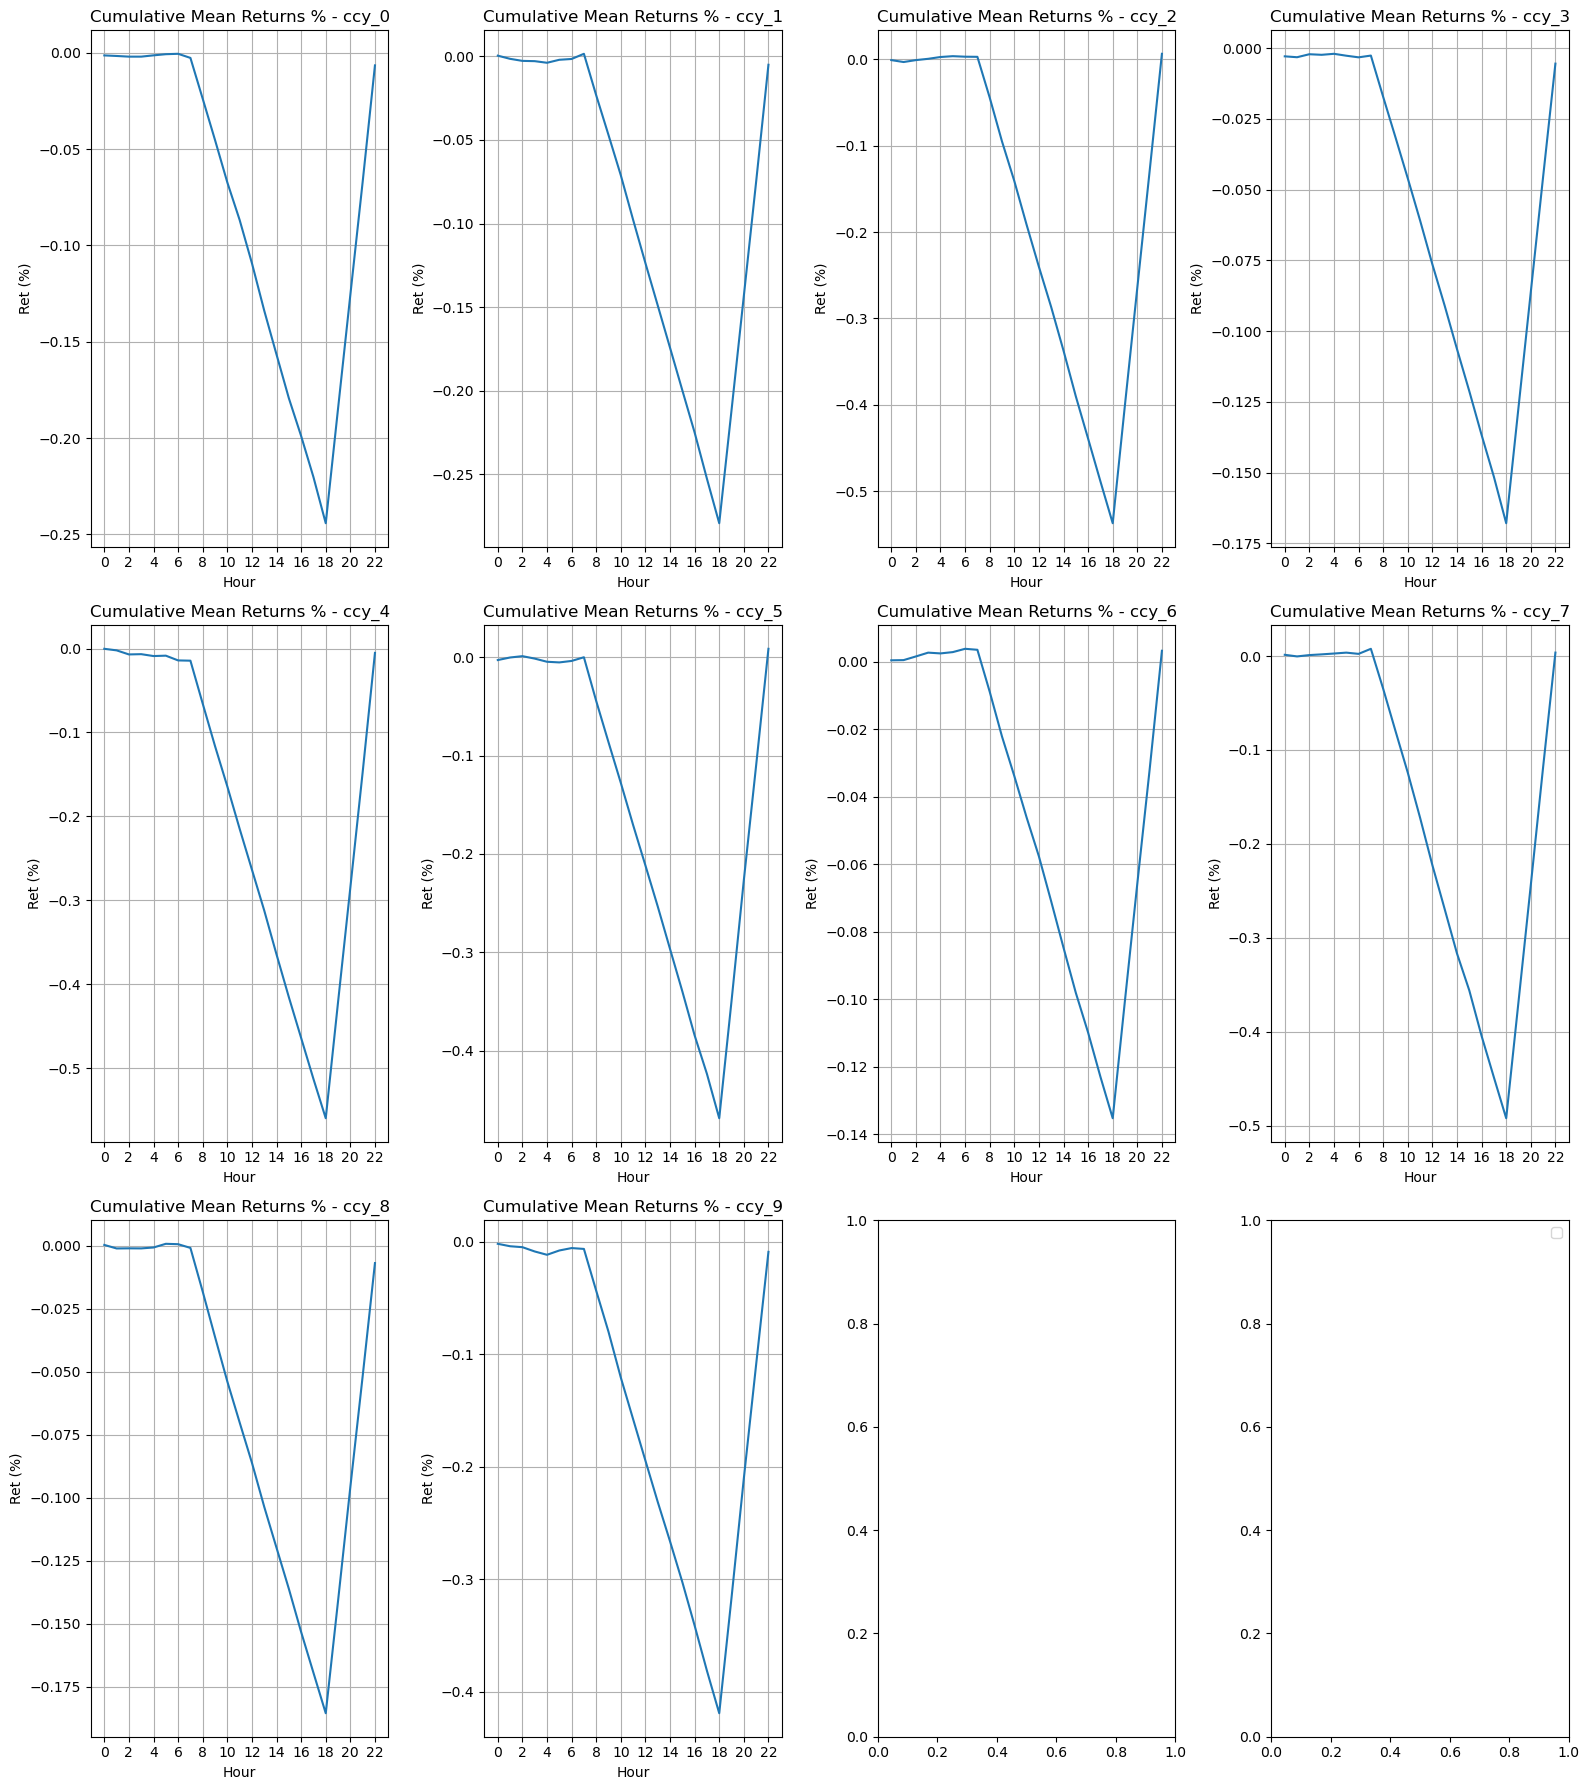

In [14]:
plot_cum_mean_returns_per_hour(returns)

b - We measure the Sharpe Ratio of returns per hour accross currencies. We see strong negative sharpe ratio in the domestic session vs strong positive sharpe ratio in the foreign session. <br> The Sharpe Ratio allows us to have a normalized view across hours and currencies, since their volatility profile might be different.

In [15]:
sharpe_ratios_per_hr = sr_per_hour(returns)
sharpe_ratios_per_hr

,Mean across ccys,ccy_0,ccy_1,ccy_2,ccy_3,ccy_4,ccy_5,ccy_6,ccy_7,ccy_8,ccy_9
0,-0.004810,-0.011125,0.003033,-0.003161,-0.033342,-0.001103,-0.010669,0.006775,0.005367,0.003947,-0.007822
1,-0.007754,-0.003317,-0.018978,-0.011237,-0.005233,-0.009287,0.014893,0.001162,-0.009522,-0.021261,-0.014759
2,0.002086,-0.003978,-0.012334,0.011158,0.017507,-0.023920,0.007730,0.021749,0.007844,0.000809,-0.005707
3,-0.000912,-0.000013,-0.001665,0.007575,-0.003399,0.001557,-0.014303,0.022683,0.004336,-0.000455,-0.025439
4,-0.002899,0.007728,-0.009592,0.010617,0.005971,-0.011282,-0.018520,-0.004542,0.004904,0.005521,-0.019795
5,0.007791,0.006873,0.017862,0.004900,-0.011408,0.002291,-0.003758,0.007591,0.005380,0.022190,0.025988
6,-0.000019,0.002384,0.004834,-0.003056,-0.009596,-0.028036,0.008724,0.019652,-0.007351,-0.002343,0.014600
7,0.003299,-0.024510,0.030697,-0.000749,0.010273,-0.001558,0.021833,-0.005693,0.030071,-0.022256,-0.005122
8,-0.248656,-0.246065,-0.249414,-0.239524,-0.240802,-0.254411,-0.254735,-0.248935,-0.234640,-0.265414,-0.252619
9,-0.250841,-0.245371,-0.239085,-0.257029,-0.240239,-0.250936,-0.241136,-0.262709,-0.250952,-0.271583,-0.249367


Text(0.5, 0, 'Hour')

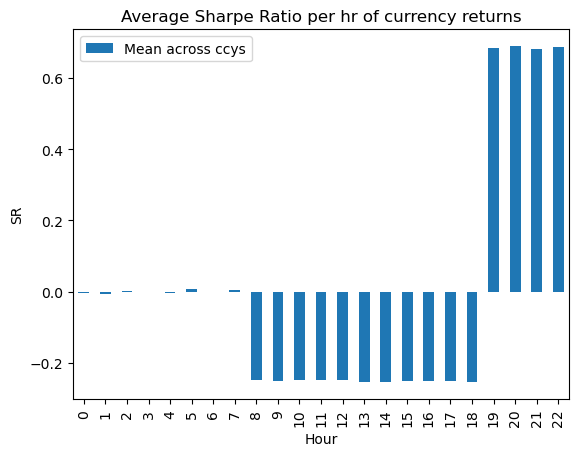

In [16]:
sharpe_ratios_per_hr[['Mean across ccys']].plot(kind='bar')
plt.title('Average Sharpe Ratio per hr of currency returns')
plt.ylabel('SR')
plt.xlabel('Hour')

# IV - Significance test
#### The article suggests a number of tests to identify if the returns measured are satistically significant or a product of randomness.
#### We will split our day into the 4 trading sessions described earlier and will measure each overall session return.
<br>

#### 1) We will measure the mean return across session and perform an univariate t-tests, this will allow us to know if the mean is significantly different from 0.
<br>


#### 2) We will perform a bivariate t-test and simultaneous Welch test across all our currencies to check if the means are significantly different across trading sessions.
#### Hence this will confirm that the patterns seen across the different sessions are statistically different
<br>


#### 3) The article uses a GARCH(1,1) model. It takes interests in the mean equation and it then looks at the sign of the intercept and its satistical significance to confirm our findings regarding trading session returns.
<br>


#### 4) Finally the article perform a regression of the session returns against the realised volatility of the returns.
#### We will not investigate this further as it is simply outlining a trivial relationship from the definition of the variables. 
#### The realised volatility being defined in the article as the  square root of the sum of the squared hourly returns within the session, it is by construction linked to the session returns. High returns will be correlated with high realised volatility

We gather all the results in one dictionary

In [17]:
results = do_and_visualize_analysis(data)

#### 1) Mean Return (%) per session and ccy.


We display the mean return per session highlighted by their pvalues from the one sample t-test. 


The one sample t-test tests the hypothesis H0 beta=0. If the p-value is below 0.05 it means that we have less than 5% chance of being wrong by rejecting H0. We can then conclude that the mean (beta) is significant

**Going forward all values significant at the 5% confidence level (p_value<0.05) will be displayed in a green cell vs a red cell for values not significant at the 5% level**

We see that Domestic session and LDN NY overlap exhibit significant negative returns while the US session exhibits significant positive returns.

The returns in Non US session are not significant

In [18]:
results['styled_mean_by_session']

,Domestic,LDN-NY,US,Non US
ccy_0,-0.001540,-0.000876,0.002377,-0.000026
ccy_1,-0.001758,-0.001050,0.002742,0.000015
ccy_2,-0.003401,-0.001999,0.005435,0.000029
ccy_3,-0.001037,-0.000616,0.001625,-0.000026
ccy_4,-0.003502,-0.001952,0.005547,-0.000145
ccy_5,-0.002968,-0.001723,0.004777,0.000002
ccy_6,-0.000883,-0.000506,0.001386,0.000036
ccy_7,-0.003244,-0.001754,0.004958,0.000077
ccy_8,-0.001190,-0.000656,0.001786,-0.000008
ccy_9,-0.002600,-0.001529,0.004102,-0.000062


#### 2) Bivariate t-tests and simultaneous welch test


We will first normalize the returns by the length of the trading sessions before comparing them, otherwise the tests might lose their significance.

The Bivariate t-tests tests for each ccy the hypothesis that mean return of trading session i is equal to the mean return of the domestic trading session.


The Welch F-test tests the hypothesis that all mean returns across all trading sessions are equal.

Both tests had significant p-values, allowing us to reject the null hypothesis at the 5% confidence level, with the exception of the LDN-NY overlap session that we had already graphically identified as behaving similarly to the Domestic session.  

This suggests that overall we are seeing three different behaviours/patterns across trading sessions.

In [19]:
results['styled_two_sample_ttest']

,LDN-NY,US,Non US
ccy_0,-0.166973,-122.478683,-35.217864
ccy_1,1.442999,-120.307509,-35.700982
ccy_2,0.900215,-120.108484,-34.994265
ccy_3,1.217722,-118.299093,-33.682533
ccy_4,-0.777584,-119.335618,-33.506716
ccy_5,0.496502,-119.926312,-34.485241
ccy_6,0.070570,-119.237169,-36.582595
ccy_7,-1.787301,-123.251928,-37.556260
ccy_8,-1.166846,-120.960903,-35.882376
ccy_9,0.943783,-121.197090,-34.492718


In [20]:
results['styled_simultaneous_welch_test']

,0
ccy_0,6282.770789
ccy_1,6203.620187
ccy_2,6183.867058
ccy_3,5970.004660
ccy_4,6042.115476
ccy_5,6153.404189
ccy_6,6125.204306
ccy_7,6280.202181
ccy_8,6122.828418
ccy_9,6292.300036


#### 3) GARCH (1,1)


Intraday returns often exhibit heteroscedasticity and autocorrelation. For this reasons t-tests and F-tests which assume uncorrelated error and homoscedasticity might lose some of their power.


As a sanity check of our conclusions, we use the GARCH(1,1) model presented in the article with lag=2. GARCH allows to model heteroscedasticity and autocorrelation in the variance of errors.

We estimate the GARCH coefficients through Maximum Likelihood Estimation, using arch package.


We are especially interested in the constant mean from the GARCH mean equation for each session.
We see that the constant mean per session is consistant with our previous finding, in terms of sign and significance.

In [23]:
# Jupyter Notebook seems to have some compatibility issues with arch package
# So we will load our results csv in this cell. The results were computed running the garch.py function in another python terminal.
garch_means = pd.read_csv('./garch_means.csv',index_col=[0])
garch_pvals = pd.read_csv('./garch_pvals.csv',index_col=[0])
styled_means = style_df_based_on_pval(garch_means,garch_pvals)
styled_means

,Domestic,LDN-NY,US,Non US
ccy_0,-0.001906,-0.001091,0.002972,0.000021
ccy_1,-0.002858,-0.001620,0.004263,-0.000050
ccy_2,-0.000727,-0.000402,0.001119,0.000006
ccy_3,-0.001562,-0.000906,0.002487,-0.000048
ccy_4,-0.001138,-0.000662,0.001809,-0.000019
ccy_5,-0.000957,-0.000533,0.001540,0.000015
ccy_6,-0.001233,-0.000713,0.001969,-0.000007
ccy_7,-0.001680,-0.000976,0.002636,-0.000004
ccy_8,-0.001847,-0.000987,0.002887,0.000007
ccy_9,-0.002208,-0.001317,0.003539,-0.000030


# V) Robustness Check through bootstrapping
#### To check the robustness of the results and make sure they are not sample dependant, we will perform bootstrapping.
#### Over 1000 iterations we sample randomly a subset of 1000 returns per trading sessions.


#### 1) We infer the empirical probability of having negative sharpe ratio per trading session and it is consistent with our findings: probability close to 1 (this is expected since it is simulated data) in Domestic and overlap session, probability of 0 in US session, probability around 50% in Non US session.


#### 2) We plot the distribution of Sharpe Ratios across trading sessions and this confirms: a consistent positive sharpe ratio in US Session, a consistent negative sharpe ratio in Domestic session and overlap session, a random pattern in Non US Session.

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 751.14it/s]


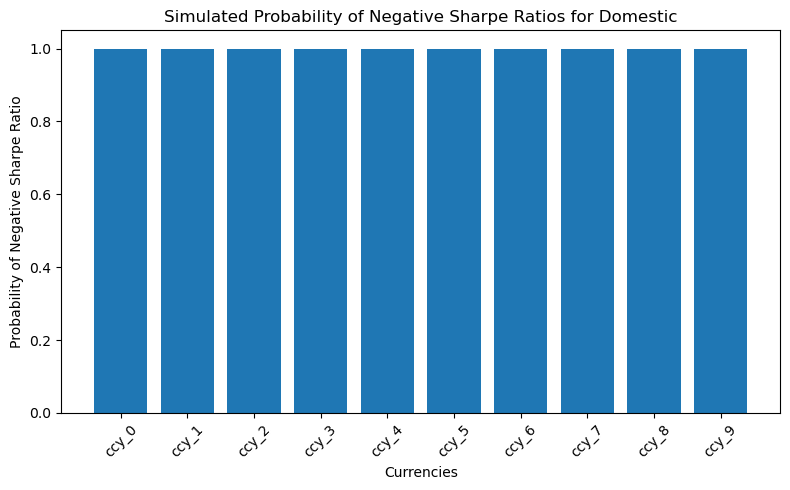

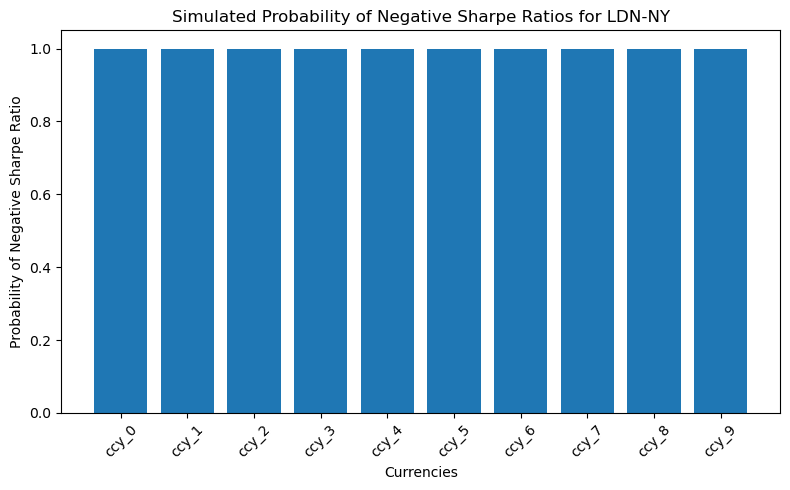

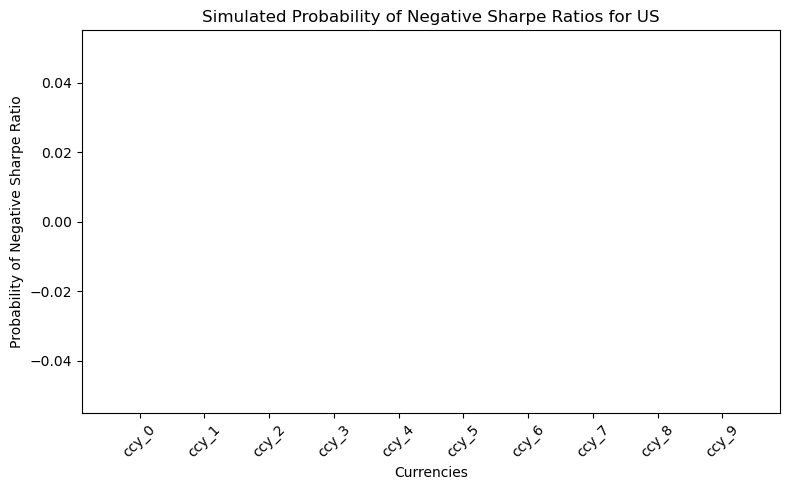

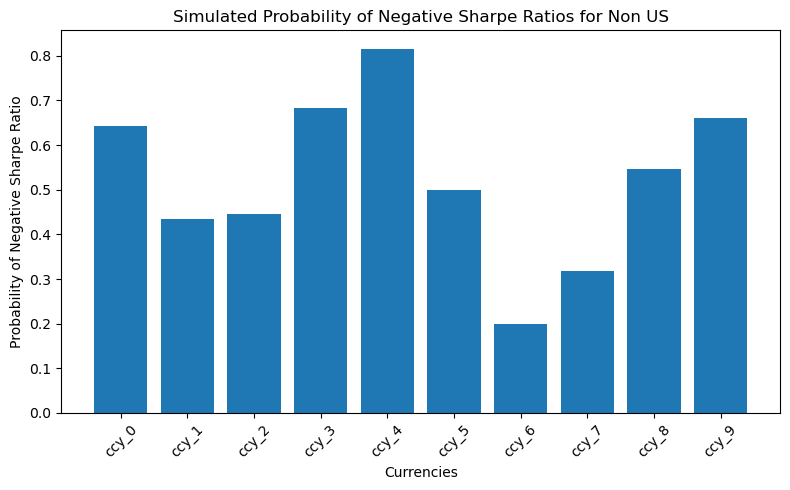

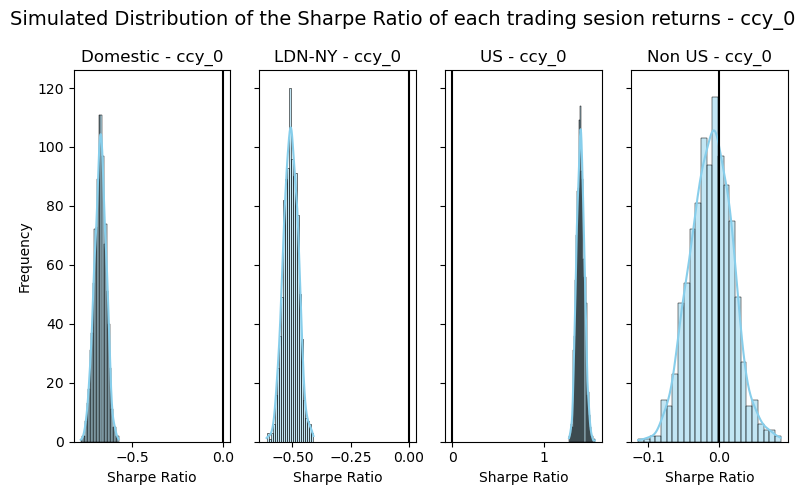

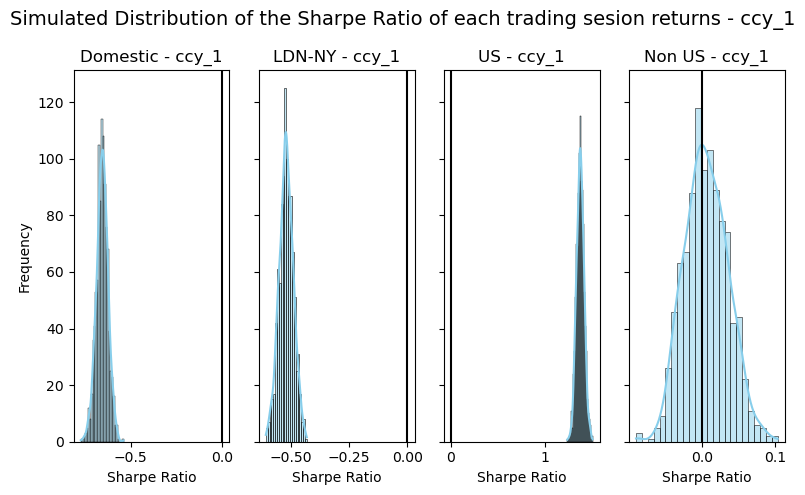

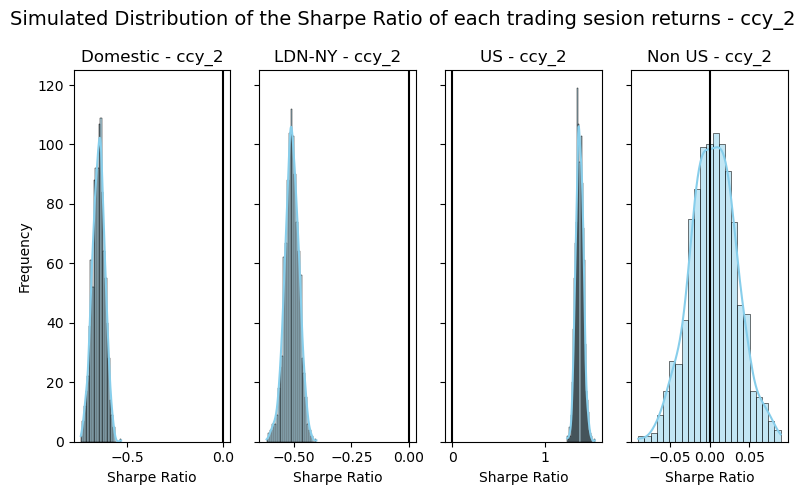

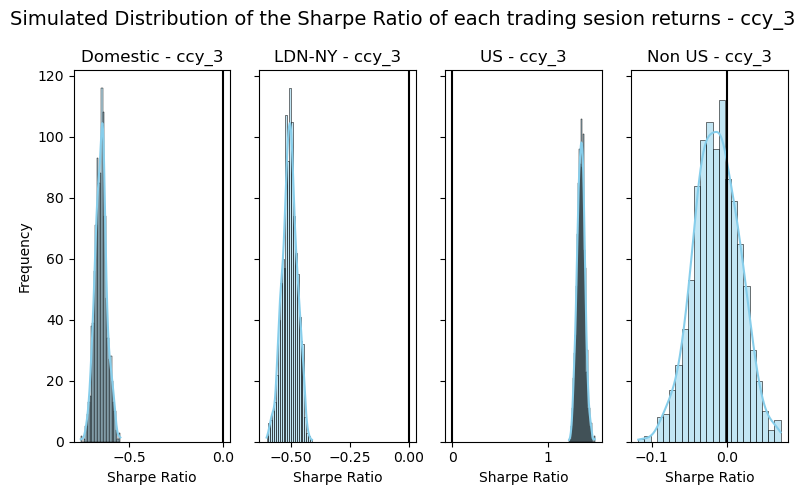

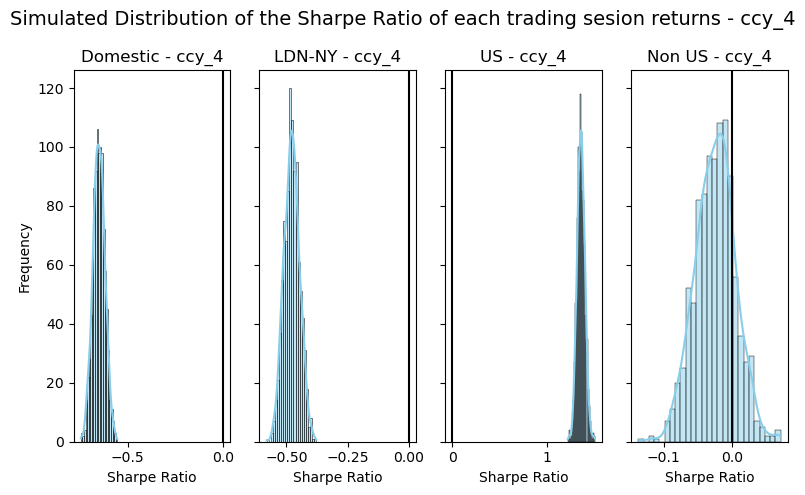

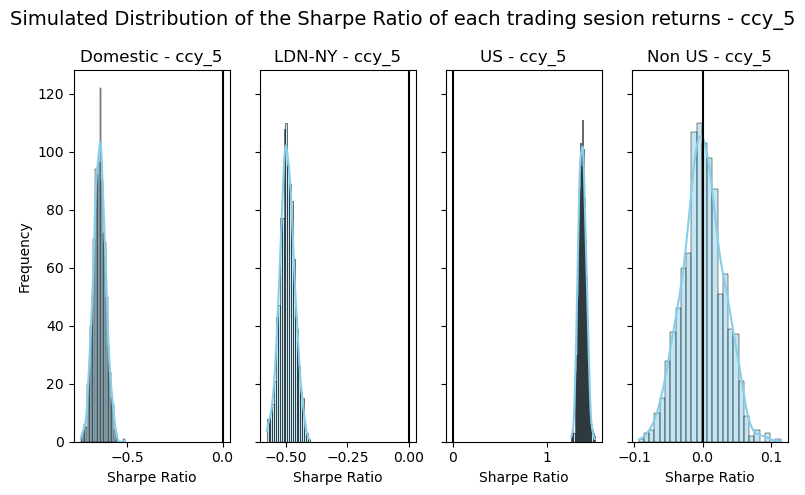

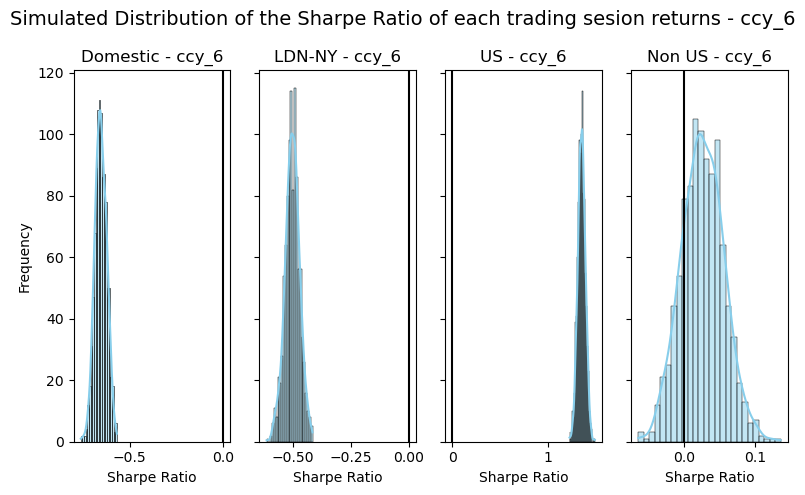

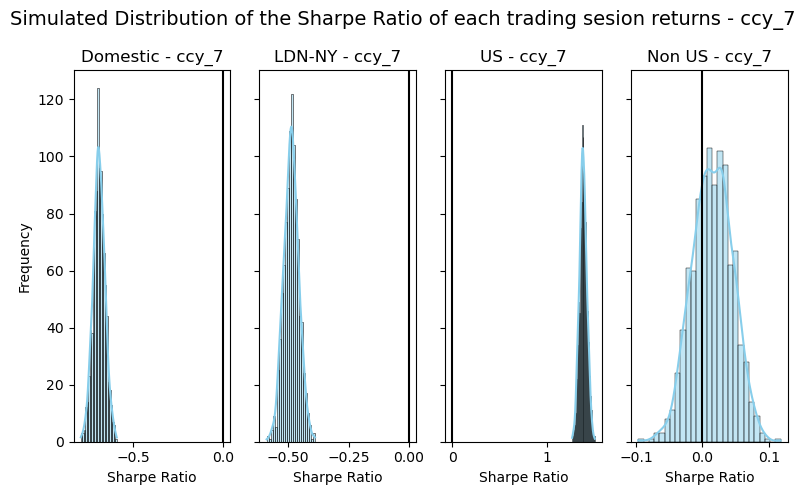

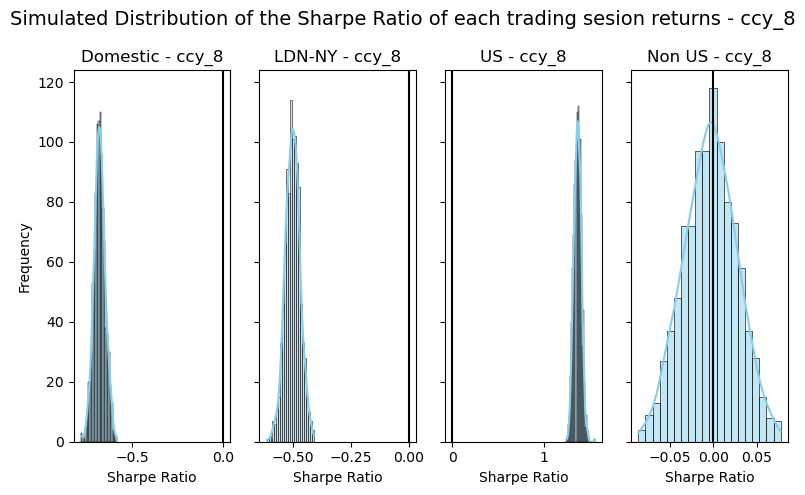

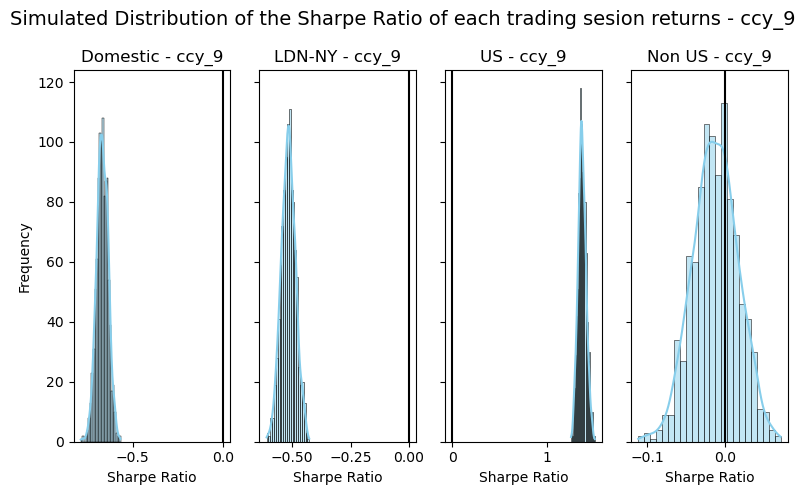

In [24]:
sessions = partition_returns_into_session(returns)
bootstrap_analysis(sessions, n_iterations=1000, sample_size=1000)

# VI)  Final Word

#### We have given strong evidence that:
#### 1)home currencies tend to depreciate during domestic trading hours and the LDN-NY overlap session.
#### 2) home currencies tend to appreciate during US session.
#### 3) home currencies don't show any special pattern in Non US session.

#### One could profit from this effect by trading this seasonal pattern (if and only if the magnitude of this effect is greater than transaction costs), or one might adjust their execution strategy based on those patterns.

#### For a real world analysis it would have been interesting to analyze the volume profile of currencies during those trading sessions, to see if the patterns are exacerbated in low liquidity periods, which might not be easily tradeable. It would also have been interesting to see if this effect is persistent in the futures/forwards markets vs spot.
